In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
mpl.style.use('ggplot')  # 통계 그래프에 적합한 스타일 선택

In [4]:
import seaborn as sns

# Series

In [5]:
# Series 객체 생성
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [6]:
list(s.index)

[0, 1, 2, 3]

In [7]:
s.values

array([ 909976, 8615246, 2872086, 2273305], dtype=int64)

In [8]:
# index 속성에 새로운 index 목록 할당
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [9]:
s = pd.Series([909976, 8615246, 2872086, 227330], name="Population",
             index=["Stockholm", "London", "Rome", "Paris"])

In [10]:
s["London"]

8615246

In [11]:
s.Stockholm

909976

In [12]:
# index list를 사용해 Series 객체 인덱싱
# 새로운 Series 객체 생성
s[["Paris", "Rome"]]

Paris     227330
Rome     2872086
Name: Population, dtype: int64

In [13]:
# 중앙값, 평균값, 표준편차 계산
s.median(), s.mean(), s.std()

(1891031.0, 3156159.5, 3808136.277482158)

In [14]:
# 최대, 최소값 계산
s.min(), s.max()

(227330, 8615246)

In [15]:
# 분위수 계산
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(739314.5, 1891031.0, 4307876.0)

In [16]:
s.describe()  # 데이터 요약

count    4.000000e+00
mean     3.156160e+06
std      3.808136e+06
min      2.273300e+05
25%      7.393145e+05
50%      1.891031e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

<AxesSubplot:title={'center':'pie'}, ylabel='Population'>

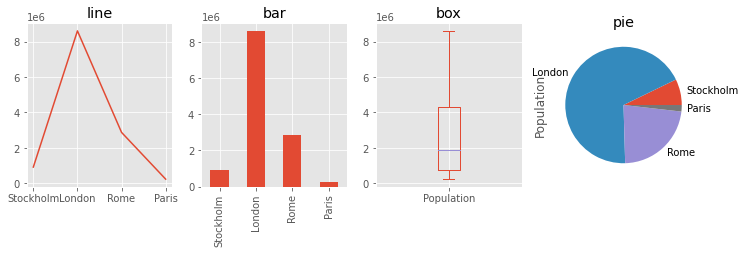

In [17]:
# Series.plot 메서드를 사용해 도식화
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

# DataFrame

In [18]:
# DataFrame 초기화
df = pd.DataFrame([[909976 , "Sweden" ], 
[8615246 , "United Kingdom"] , 
[2872086 , "Italy"] , 
[2273305 , "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [19]:
# 행, 열에 대한 레이블 인덱싱
df.index = ["Stockholm", "London","Rome", "Paris"]
df.columns = ["Population", "State"]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [20]:
df = pd.DataFrame([[909976, "Sweden"],
                  [8615246, "United Kingdom"], 
                  [2872086, "Italy"], 
                  [2273305, "France"]], 
                  index=["Stockholm", "London", "Rome", "Paris"], 
                  columns=["Population", "State"]) 

In [21]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305], 
                    "State": ["Sweden" , "United Kingdom", "Italy", 
                    "France"]}, 
                    index=["Stockholm", "London", "Rome", "Paris"]) 

In [22]:
df.Population  # DataFrame에서 열 추출해 새로운 Series 객체 생성

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [23]:
df.loc["Stockholm"]  # DataFrame에서 행 추출해 새로운 Series 객체 생성

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [24]:
df.loc[["Paris", "Rome"]]  # 선택한 행만 포함하는 새로운 DataFrame 생성

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [25]:
df.loc[["Paris", "Rome"], "Population"]  # 행, 열 동시에 선택

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [26]:
df.mean()

C:\Users\82105\AppData\Local\Temp\ipykernel_19504\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Population    3667653.25
dtype: float64

In [27]:
df.info()  # DataFrame의 내용 요약

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [28]:
df.dtypes  # DataFrame의 각 열의 데이터 유형

Population     int64
State         object
dtype: object

In [33]:
!head -n 5 european_cities.csv 

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [34]:
df_pop = pd.read_csv("european_cities.csv",
                    delimiter=",", encoding="utf-8", header=0)

In [35]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [36]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London,United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [37]:
# apply 메서드를 사용해 "," 제거 후 문자열을 정수로 변환
df_pop["NumericPopulation"] = df_pop.Population.apply( 
            lambda x: int(x.replace(",", ""))) 
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [38]:
# strip 문자열 메서드를 통해 공백 제거
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip()) 
df_pop.head() 

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London,United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [39]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [40]:
df_pop2 = df_pop.set_index("City")  # 열 지정
df_pop2 = df_pop2.sort_index()  # 인덱스 기준으로 정렬
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [41]:
# State와 City를 인덱스로 하는 계층적 인덱스를 생성하고 State(첫번째 인덱스) 기준으로 정렬
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)
df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

In [42]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [43]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericPopulation                 528014
Name: (Sweden, Gothenburg), dtype: object

In [44]:
# sort_values 메서드를 사용해 열 기준 오름차순 정렬 
df_pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[False, True]).head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [45]:
city_counts = df_pop.State.value_counts()  # 각 범주의 개수 계산
city_counts.head()

Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: State, dtype: int64

In [46]:
# State와 City를 사용해 계층적 인덱스를 만들고 sum 메서드를 통해 하나로 축소 후
# NumericPopulation열에 따라 내림차순
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation", ascending=False)
df_pop4.head()

C:\Users\82105\AppData\Local\Temp\ipykernel_19504\2764704980.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation", ascending=False)


,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [47]:
# drop 메서드를 사용해 Rank열 제거
# groupby 메서드를 통해 축소
df_pop5 = (df_pop.drop("Rank", axis=1)
                 .groupby("State").sum()
                 .sort_values("NumericPopulation", 
                              ascending=False))
df_pop5.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


Text(0.5, 0, 'Total pop. in top 105 cities')

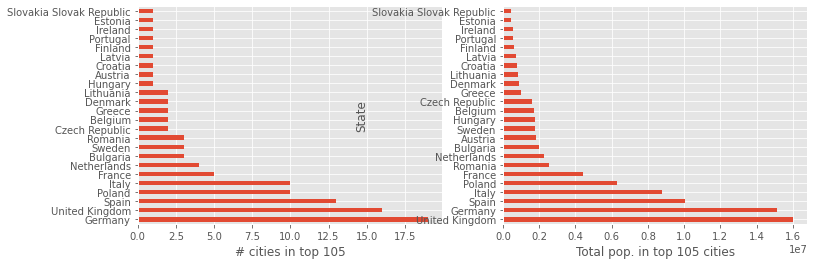

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")

# 시계열

In [50]:
# 날짜 시퀀스 생성
# period 키워드 인수를 통해 범위 설정
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [51]:
# freq 키워드 인수를 통해 시점 빈도 지정
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [52]:
# date_range 함수는 DatetimeIndex의 인스턴스를 반환, 인덱스로 사용 가능
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int32

In [53]:
# 날짜 및 시간 문자열로 인덱싱
ts1["2015-1-3"]

2

In [54]:
# DatetimeIndex의 원소는 timestamp 유형
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [55]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [56]:
ts1.index[2].nanosecond # timestamp는 나노초 정밀도로 시간 저장, datetime 객체는 마이크로초 정밀도만 사용

0

In [57]:
ts1.index[2].to_pydatetime()  # Timestamp 객체를 표준 datatime 객체로 변환

datetime.datetime(2015, 1, 3, 0, 0)

In [58]:
# datetime 객체 리스트를 사용하여 pandas 시계열 생성
import datetime
ts2 = pd.Series(np.random.rand(2),
               index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])
ts2

2015-01-01    0.517356
2015-02-01    0.756645
dtype: float64

In [59]:
# 시간 간격 시퀀스로 정의된 데이터는 PeriodIndex 클래스 사용
periods = pd.PeriodIndex([pd.Period('2015-01'),
                         pd.Period('2015-02'),
                         pd.Period('2015-03')])
ts3 = pd.Series(np.random.rand(3), index=periods)
ts3

2015-01    0.600030
2015-02    0.480461
2015-03    0.371684
Freq: M, dtype: float64

In [60]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]')

In [61]:
ts2.to_period('M')  # PeriodIndex로 변환

2015-01    0.517356
2015-02    0.756645
Freq: M, dtype: float64

In [62]:
!head -n 5 temperature_outdoor_2014.tsv

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [63]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [64]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [65]:
# UNIX 시간을 날짜 및 시간 객체로 변환
# tz_localize를 이용해 timestamp를 지역화(시간대 할당)
# tz_convert를 사용해 시간대 속성 변환
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))
# set_index를 사용해 시간 열을 인덱스로 설정
df1 = df1.set_index("time")
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time")
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


<AxesSubplot:xlabel='time'>

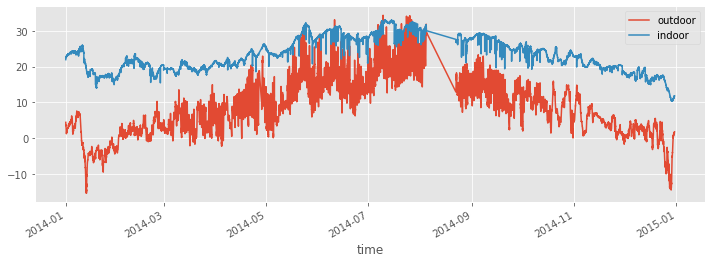

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  49548 non-null  float64
dtypes: float64(1)
memory usage: 774.2 KB


In [68]:
# 1월 데이터 선별, 분석
mask_jan = (df1.index >= "2014-1-1") & (df1.index < "2014-2-1")
df1_jan = df1[mask_jan]
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [69]:
df2_jan = df2["2014-1-1":"2014-1-31"]

<AxesSubplot:xlabel='time'>

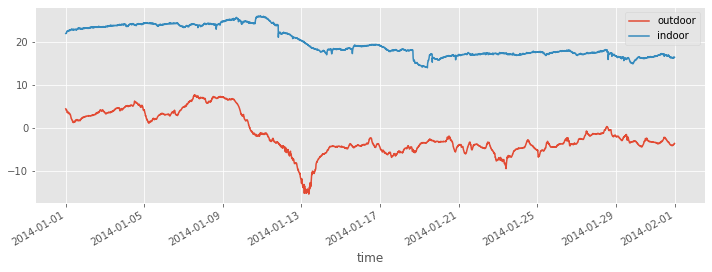

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

In [71]:
# 새로운 month열 생성 후 DatetimeIndex 인덱서의 Timestamp 값에 있는 month 필드 할당
df1_month = df1.reset_index()
df1_month["month"] = df1_month.time.apply(lambda x: x.month)
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [72]:
# month 필드로 그룹화하고 평균 계산
df1_month = df1_month.groupby("month").aggregate(np.mean)

In [73]:
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [74]:
df_month = df1_month.join(df2_month)  # df1, df2 병합
df_month.head(3) 

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [75]:
# 앞 과정을 한번에 적용
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)
df_month.head(3)

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


<AxesSubplot:>

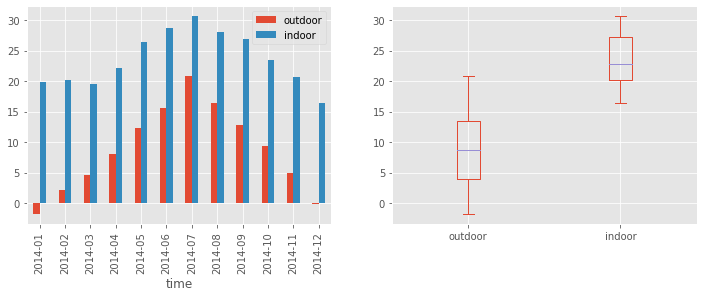

In [76]:
# 월별 평균 내외부 온도와 월별 내외부 온도를 박스 그래프로 도식화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

In [77]:
# 4개의 다른 표본 주기로 재표본. 시계열을 업샘플링 또는 다운샘플링
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]
df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]
df1_week = df1.resample("7D").mean()
df1_week.columns = ["outdoor (weekly avg.)"]
df1_month = df1.resample("M").mean()
df1_month.columns = ["outdoor (monthly avg.)"]
# 일 평균으로 재표본하여 구한 실내외 일일 평균 온도 차이
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

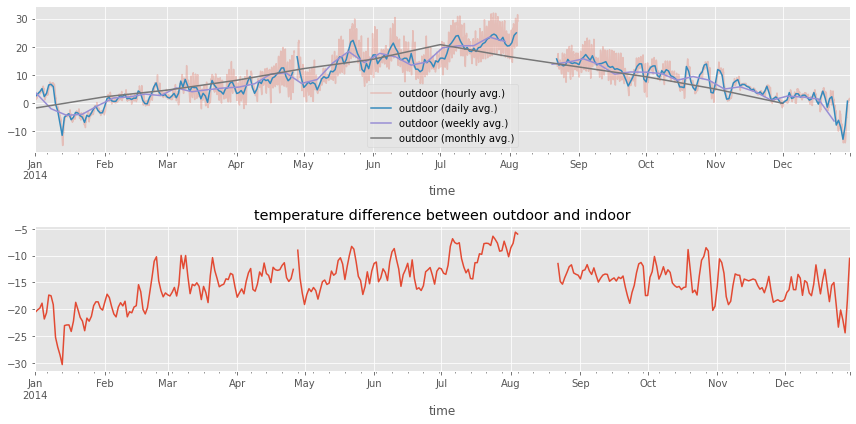

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)
df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")
fig.tight_layout()

In [78]:
# 5분 주기 재표본(업샘플링 - 누락된 값 채우기)하여 결합
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
           df1.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
           df1.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})], axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


In [79]:
sns.set(style="darkgrid")

<AxesSubplot:xlabel='time'>

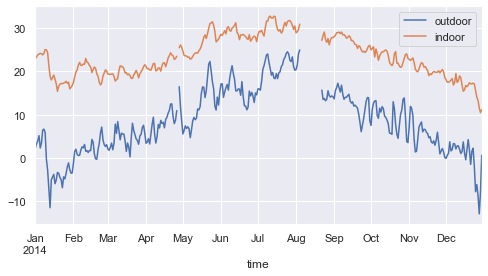

In [80]:
# Seaborn 라이브러리로 스타일 설정 후 pandas 라이브러리를 사용해 Matplotlib로 시계열 도식화
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df1 = df1.set_index("time").resample("10min").mean()
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean()
df_temp = pd.concat([df1, df2], axis=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\82105\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) o

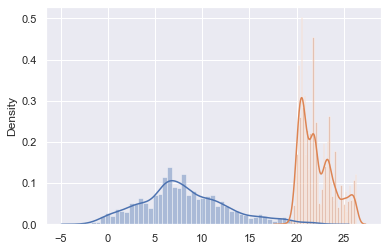

In [81]:
# kdplot과 distplot을 이용해 4월 내외부 데이터셋을 히스토그램 위에 중첩시켜 도식화
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


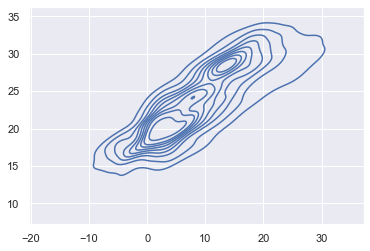

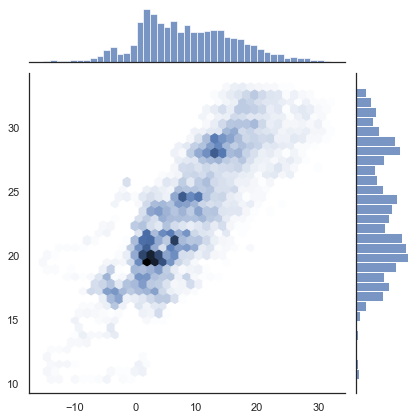

In [82]:
# 시간당 평균으로 재표본된 실내외 데이터 상관관계
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
            df_temp.resample("H").mean()["indoor"].dropna().values, shade=False)
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                  df_temp.resample("H").mean()["indoor"].values, kind="hex")

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

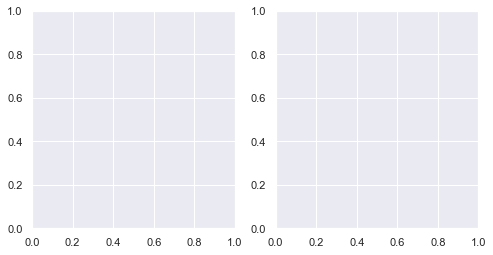

In [83]:
# 범주형 변수를 가진 데이터셋을 나타내는 그래프 유형인 boxplot, violinplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(df_temp.dropna(), ax=ax2, palette="pastel")

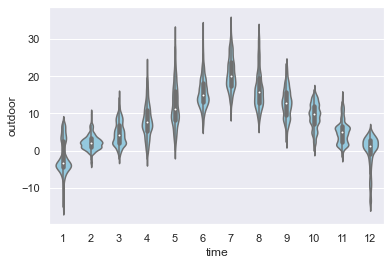

In [84]:
# 외부 데이터셋을 월별로 분할
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor, color="skyblue");

In [85]:
# 월, 시간 필드 추출해 새 열에 할당
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour
# 온도 데이터셋을 피봇시켜 일중 시간이 열, 연중 월이 행이 되도록 하고 모든 값의 평균 계산
table = pd.pivot_table(df_temp, values='outdoor',
                       index=['month'], columns=['hour'],
                             aggfunc=np.mean)

<AxesSubplot:xlabel='hour', ylabel='month'>

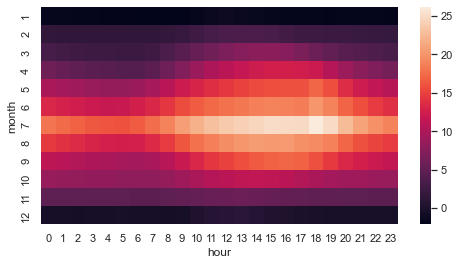

In [86]:
# 일중 시간과 연중 월로 그룹화된 외부 온도 히트맵
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax)